In [11]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

data = pd.read_csv("../dataset.csv", sep=",", header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,0.626716,0.496635,-0.303241,0.999972,0.631745,0.487965,-0.298811,0.999939,0.632516,0.486255,...,0.850175,0.470190,0.566293,0.510570,0.731715,0.396344,0.553681,0.199753,0.944461,0
1,0.617462,0.418762,-0.536582,0.999934,0.619391,0.403825,-0.520232,0.999742,0.620330,0.402408,...,0.930630,0.431331,0.545511,0.602365,0.685186,0.399336,0.551977,0.329486,0.965878,0
2,0.397143,0.485369,-0.204339,0.999631,0.393117,0.470164,-0.221302,0.999731,0.394211,0.468860,...,0.527785,0.621427,0.645961,0.228755,0.908630,0.421150,0.672167,0.075367,0.797785,0
3,0.383151,0.532236,-0.036839,0.997147,0.378772,0.521106,-0.055801,0.998120,0.379173,0.519975,...,0.435869,0.696118,0.714615,-0.129727,0.974512,0.611351,0.696266,0.367184,0.505504,0
4,0.376672,0.539397,-0.015190,0.999431,0.372772,0.528651,-0.031600,0.999563,0.372984,0.527425,...,0.541708,0.694047,0.718522,-0.140287,0.956630,0.667380,0.716433,0.121148,0.575782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.411379,0.508813,-0.199924,0.999736,0.420732,0.496120,-0.209401,0.999841,0.422357,0.496520,...,0.155837,0.490999,0.622254,0.233072,0.217715,0.480544,0.604843,0.325815,0.161920,1
69,0.427620,0.442117,-0.144919,0.994815,0.430610,0.435024,-0.152000,0.994966,0.431341,0.435829,...,0.110425,0.428010,0.679987,0.225669,0.449817,0.408216,0.655712,0.298584,0.185998,1
70,0.433445,0.453308,-0.137280,0.916020,0.433401,0.445865,-0.143137,0.889033,0.433655,0.446480,...,0.127948,0.428354,0.661973,0.204588,0.389104,0.410649,0.651578,0.253752,0.230083,1
71,0.613094,0.450769,-0.469051,0.999601,0.610310,0.437036,-0.454837,0.998679,0.610490,0.435347,...,0.956201,0.399782,0.546342,0.474856,0.661755,0.377407,0.525009,0.266727,0.965636,1


<AxesSubplot:xlabel='132', ylabel='count'>

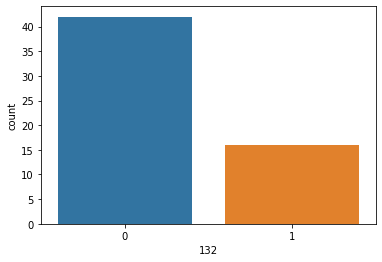

In [13]:
#학습용 데이터, 검증용 데이터 나누기
x_train, x_valid, y_train, y_valid = train_test_split(data.drop(132, axis=1), data[132], test_size=0.2, random_state=1221)

x_train.shape, y_train.shape

sns.countplot(y_train)

In [14]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [15]:
#knn 최적 k값 찾기 1~26 까지 설정
k_range = range(1,26)
scores = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_valid)
    scores[k] = metrics.accuracy_score(y_valid,y_pred)
    print('k is %d, score is %f' %(k, scores[k]))
    score_list.append(metrics.accuracy_score(y_valid,y_pred))

k is 1, score is 0.933333
k is 2, score is 0.866667
k is 3, score is 0.866667
k is 4, score is 0.866667
k is 5, score is 0.800000
k is 6, score is 0.866667
k is 7, score is 0.866667
k is 8, score is 0.800000
k is 9, score is 0.866667
k is 10, score is 0.800000
k is 11, score is 0.866667
k is 12, score is 0.866667
k is 13, score is 0.866667
k is 14, score is 0.866667
k is 15, score is 0.866667
k is 16, score is 0.800000
k is 17, score is 0.866667
k is 18, score is 0.800000
k is 19, score is 0.800000
k is 20, score is 0.800000
k is 21, score is 0.800000
k is 22, score is 0.800000
k is 23, score is 0.800000
k is 24, score is 0.800000
k is 25, score is 0.800000
